In [1]:
#imports
import numpy as np
from codes import L_qubit, Stabiliser, measure_stabiliser, X_l, apply_random_noise
from qiskit_aer import AerSimulator
backend = AerSimulator(method = 'statevector')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#initialise two logical qubits

LQ1 = L_qubit()
LQ2 = L_qubit()

In [3]:
#show initialisation in logical 0 state and X gate
zero_state = LQ1.lq_circ.copy()
zero_state.measure_all()
print(backend.run(zero_state).result().get_counts())
one_state = LQ1.lq_circ.copy()
X_l(one_state)
one_state.measure_all()
print(backend.run(one_state).result().get_counts())


{'0001010 000': 510, '0000101 000': 514}
{'0001001 000': 509, '0000110 000': 515}


[4, 0, 1]
[5, 2, 3]
[6, 0, 1, 2, 3]


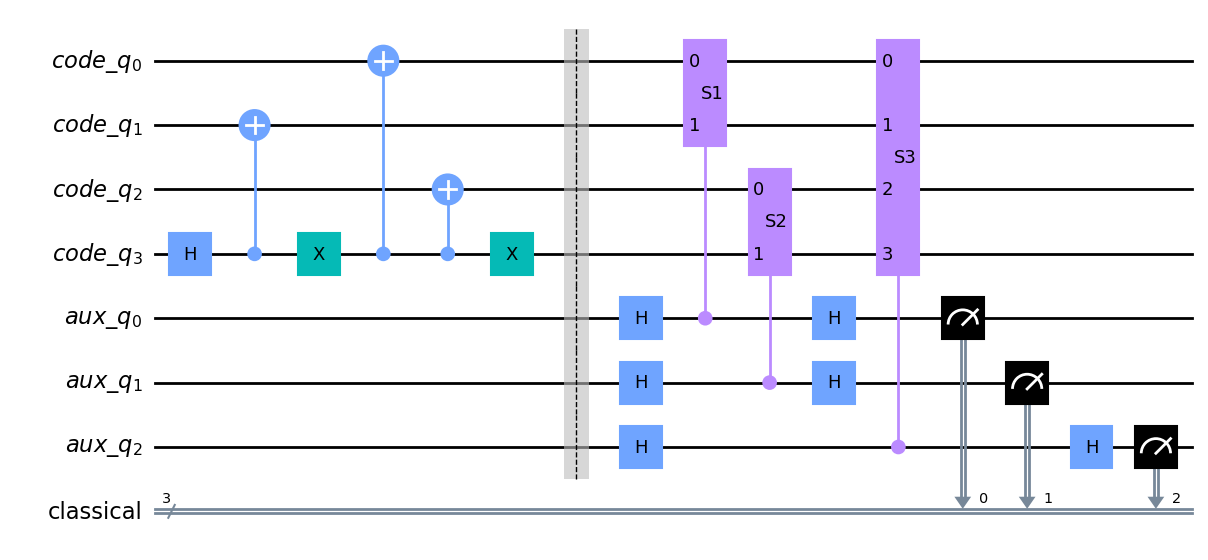

In [4]:
#showcase measuring stabilisers
#NOTE: in the paper there's a global minus sign in front of s1 and s2 but I don't think that should matter in theory
S1 = Stabiliser([0,1], 'z', 'S1')
S2 = Stabiliser([2,3], 'z', 'S2')
S3 = Stabiliser([0,1,2,3], 'x', 'S3')
no_errors_circ = LQ1.lq_circ.copy()
for i, stabiliser in enumerate([S1, S2, S3]):
    measure_stabiliser(stabiliser, no_errors_circ, i+4, i)
no_errors_circ.draw('mpl')

In [5]:
#run a simulation
from qiskit.utils import QuantumInstance

from qiskit import transpile

t_lq_circ = transpile(no_errors_circ, backend)
backend.run(t_lq_circ).result().get_counts()

{'011': 1024}

[4, 0, 1]
[5, 2, 3]
[6, 0, 1, 2, 3]


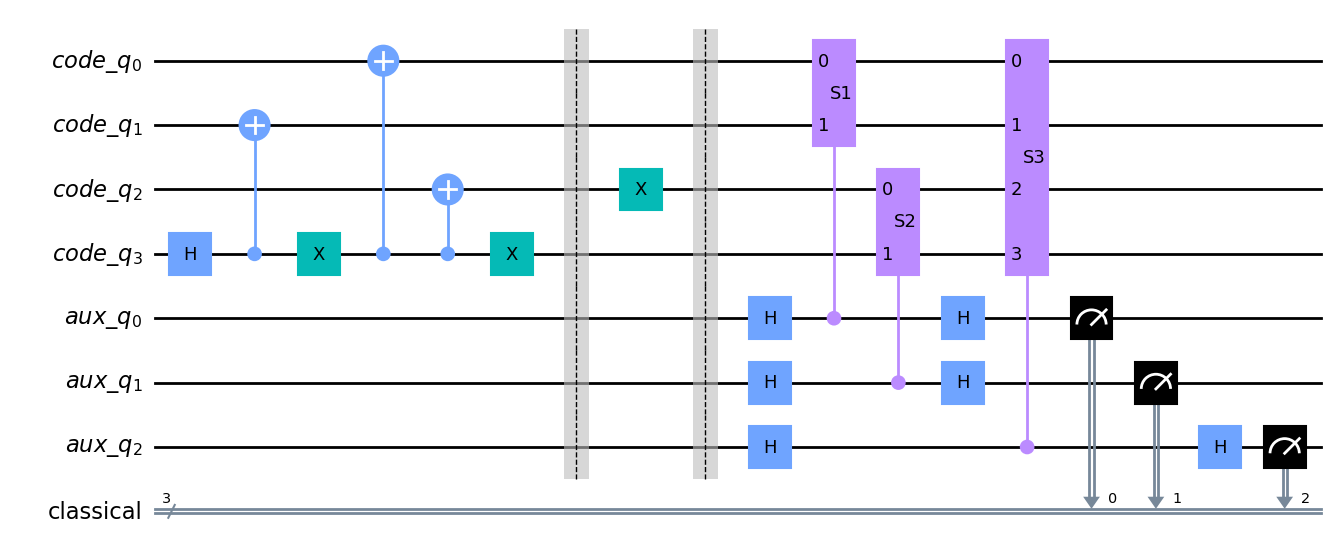

In [6]:
#showcase syndrome appearance
some_noisy_circuit = LQ1.lq_circ.copy()
apply_random_noise(some_noisy_circuit)
some_noisy_circuit.barrier()
for i, stabiliser in enumerate([S1, S2, S3]):
    measure_stabiliser(stabiliser, some_noisy_circuit, i+4, i)

some_noisy_circuit.draw('mpl')

In [7]:
t_some_noisy_circ = transpile(some_noisy_circuit, backend)
backend.run(t_some_noisy_circ).result().get_counts()

{'001': 1024}

In [20]:
#back to LS: step 1) merge the qubits

LQ_m = LQ1.merge(LQ2)
LQ_m.lq_circ.draw('mpl')

CircuitError: "Trying to compose with another QuantumCircuit which has more 'in' edges."

In [4]:
#step 2) split - obtain bell state
LQ_m.split()

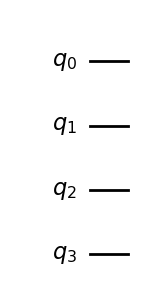